In [5]:
import matplotlib.pyplot as plt
%matplotlib inline 
import IPython.display as ipd
import librosa
import librosa.display
import pandas as pd
import os
from sklearn.preprocessing import minmax_scale
from tqdm import tqdm
import numpy as np
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split

In [6]:
df_c=pd.DataFrame(columns=["file_name", "label"])
df_p=pd.DataFrame(columns=["file_name", "label"])

In [7]:
dir="control"
for index, audio in enumerate(os.listdir(dir)):
    df_c.loc[index]=[audio, 0]
    
dir="pathology"
for index, audio in enumerate(os.listdir(dir)):
    df_p.loc[index]=[audio, 1]



# tonal centroid features(tonnetz)

In [8]:
def normalize(x, axis=0):
    return minmax_scale(x, axis=axis)

In [9]:
def feature_extractor(file):
    audio, sam_rate = librosa.load(file, res_type='kaiser_fast')
    ton_feature = librosa.feature.tonnetz(y=audio, sr=sam_rate)[0]
    return ton_feature

In [10]:
extracted_features=[]

In [11]:
dir="/home/sweety/project/src/"
for index_num, row in tqdm(df_c.iterrows()):
    file_name=os.path.join(os.path.abspath(dir), "control", str(row["file_name"]))
    f_label=row["label"]
    data=feature_extractor(file_name)
    extracted_features.append([data, f_label])
    
for index_num, row in tqdm(df_p.iterrows()):
    file_name=os.path.join(os.path.abspath(dir), "pathology", str(row["file_name"]))
    f_label=row["label"]
    data=feature_extractor(file_name)
    extracted_features.append([data, f_label])

0it [00:00, ?it/s]/home/sweety/anaconda3/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=746
  return f(*args, **kwargs)
4it [00:02,  1.76it/s]/home/sweety/anaconda3/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=879
  return f(*args, **kwargs)
5it [00:03,  2.05it/s]/home/sweety/anaconda3/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=991
  return f(*args, **kwargs)
/home/sweety/anaconda3/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=496
  return f(*args, **kwargs)
6it [00:03,  2.35it/s]/home/sweety/anaconda3/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=595
  return f(*args, **kwargs)
10it [00:05,  2.40it/s]/ho

In [12]:
len(extracted_features)

54

In [14]:
df_ton=pd.DataFrame(extracted_features, columns=["features", "label"])

In [15]:
df_sc.shape

(54, 2)

In [16]:
extracted_features[0][0].shape

(94,)

In [19]:
df_ton=pd.DataFrame(extracted_features, columns=["features", "label"])

In [20]:
df_ton.head()

,features,label
0,"[-0.02901086200254328, 0.007612033145857482, -...",0
1,"[0.01783008896106021, 0.031359184283898625, -0...",0
2,"[0.025699326240043785, 0.015348215590848258, 0...",0
3,"[0.06582945090325823, 0.14544601610057017, 0.2...",0
4,"[0.06189002114565088, 0.08603571121517782, 0.0...",0


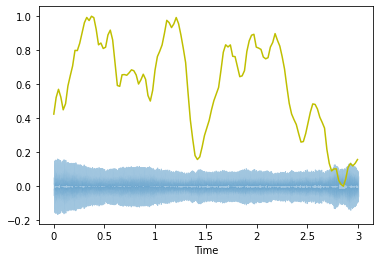

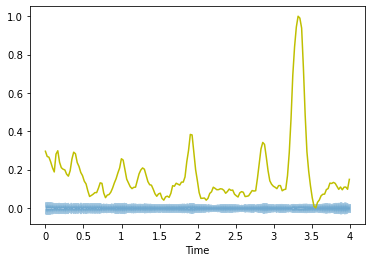

In [27]:
file="SPA2019_Pathology_068.wav"
audio, sam_rate = librosa.load(file, res_type='kaiser_fast')
ton_feature = librosa.feature.tonnetz(y=audio, sr=sam_rate)[0]

frames = range(len(ton_feature))
t = librosa.frames_to_time(frames)

librosa.display.waveshow(audio, sr=sam_rate, alpha=0.4)
plt.plot(t, normalize(ton_feature), color='y')
plt.show()



file="SPA2019_Control_004.wav"
audio, sam_rate = librosa.load(file, res_type='kaiser_fast')
ton_feature = librosa.feature.tonnetz(y=audio, sr=sam_rate)[0]

frames = range(len(ton_feature))
t = librosa.frames_to_time(frames)

librosa.display.waveshow(audio, sr=sam_rate, alpha=0.4)
plt.plot(t, normalize(ton_feature), color='y')
plt.show()
